In [2]:
import pyscreenshot as ImageGrab

In [3]:
import time

In [34]:
image_folder = "capture_images/8/"
for i in range (0,5):
    time.sleep(8)
    im = ImageGrab.grab(bbox=(372,512,884,884))
    print("saved......",i)
    im.save(image_folder+str(i)+'.png')
    print("clear screen now and redraw now.....")

saved...... 0
clear screen now and redraw now.....
saved...... 1
clear screen now and redraw now.....
saved...... 2
clear screen now and redraw now.....
saved...... 3
clear screen now and redraw now.....
saved...... 4
clear screen now and redraw now.....


In [1]:
import cv2
import csv
import glob

header = ["label"]
for i in range(0,784):
    header.append("pixel" + str(i))
with open('dataset.csv','a') as f:
    writer=csv.writer(f)
    writer.writerow(header)
    
for label in range(10):
    dirList=glob.glob("capture_images/"+ str(label)+"/*.png")
    
    for img_path in dirList:
        im=cv2.imread(img_path)
        im_gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        im_gray=cv2.GaussianBlur(im_gray,(15,15),0)
        roi=cv2.resize(im_gray,(28,28),interpolation=cv2.INTER_AREA)
        
        data=[]
        data.append(label)
        rows,cols=roi.shape
        
        for i in range(rows):
            for j in range(cols):
                k=roi[i,j]
                if k>100:
                    k=1
                else:
                    k=0
                data.append(k)
            
        with open('dataset.csv','a') as f:
                writer=csv.writer(f)
                writer.writerow(data)
    
                

In [2]:
import pandas as pd
from sklearn.utils import shuffle
data =pd.read_csv('dataset.csv')
data=shuffle(data)
data
    

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
42,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X=data.drop(["label"],axis=1)
Y=data["label"]

6


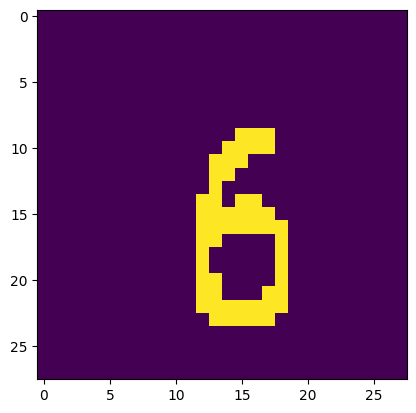

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx=34
img=X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

In [5]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.2)

In [6]:
import joblib 
from sklearn.svm import SVC
classifier=SVC(kernel="linear",random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier,"model/digit_recognizer")

['model/digit_recognizer']

In [7]:
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction,test_y))

Accuracy=  0.7


In [ ]:
import joblib
import cv2
import numpy as np
import time
import pyscreenshot as ImageGrab

model=joblib.load("model/digit_recognizer")
images_folder="img/"

while True:
    img=ImageGrab.grab(bbox=(372,512,884,884))
    
    img.save(images_folder+"img.png")
    im = cv2.imread(images_folder+"img.png")
    im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)
    
    
    ret, im_th = cv2.threshold(im_gray,100,255, cv2.THRESH_BINARY)
    roi= cv2.resize(im_th, (28,28), interpolation =cv2.INTER_AREA)
    
    rows,cols=roi.shape
    
    X=[]
    
    
    for i in range(rows):
            for j in range(cols):
                k=roi[i,j]
                if k>100:
                    k=1
                else:
                    k=0
                X.append(k)
    
    predictions = model.predict([X])
    print("Prediction:",predictions[0])
    cv2.putText(im, "Prediction is " + str(predictions[0]),(20,20),0,0.8,(0,255,0),2,cv2.LINE_AA)
    
    cv2.startWindowThread()
    cv2.namedWindow("Result")
    cv2.imshow("Result",im)
    cv2.waitKey(1000000)
    if cv2.waitKey(1)==13:
        break
cv2.destroyAllWindows()
    
    
    

C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 2


C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5


C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5


C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5


C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5
Prediction: 5


C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5
Prediction: 5


C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5
Prediction: 5


C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5
Prediction: 5


C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5


C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5
Prediction: 5


C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5
Prediction: 5


C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5


C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5


C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5
Prediction: 5


C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5
Prediction: 5


C:\Users\mohit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5
